In [1]:
import os
import sys

# 1. Clone the repository (skip if already exists)
if not os.path.exists("RenAIssance_LLM"):
    !git clone https://github.com/prashant290605/RenAIssance_LLM

%cd /content/RenAIssance_LLM

# 2. Switch to the correct branch
!git checkout RenAIssance_LLM
!git pull origin RenAIssance_LLM

# 3. Add repo to sys.path (Absolute Path)
if "/content/RenAIssance_LLM" not in sys.path:
    sys.path.append("/content/RenAIssance_LLM")

# 4. Critical: Ensure __init__.py exists for package recognition
os.makedirs("handwritten_llm_pipeline", exist_ok=True)
init_path = "handwritten_llm_pipeline/__init__.py"
with open(init_path, "w") as f:
    f.write("# Initialize package")

# Diagnostic check
print("\n--- Diagnostic Check ---")
print(f"Current Directory: {os.getcwd()}")
print(f"Is pipeline folder present? {os.path.exists('handwritten_llm_pipeline')}")
print(f"Is inference.py present? {os.path.exists('handwritten_llm_pipeline/inference.py')}")
print(f"Sys Path: {sys.path[-2:]}")
print("------------------------\n")

print("Repository setup complete.")


Cloning into 'RenAIssance_LLM'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 31 (delta 3), reused 0 (delta 0), pack-reused 23 (from 1)
Receiving objects: 100% (31/31), 49.20 MiB | 30.41 MiB/s, done.
Resolving deltas: 100% (6/6), done.
/content/RenAIssance_LLM
error: pathspec 'RenAIssance_LLM' did not match any file(s) known to git
fatal: couldn't find remote ref RenAIssance_LLM

--- Diagnostic Check ---
Current Directory: /content/RenAIssance_LLM
Is pipeline folder present? True
Is inference.py present? True
Sys Path: ['/root/.ipython', '/content/RenAIssance_LLM']
------------------------

Repository setup complete.


In [2]:
# Install required libraries
!pip install -q transformers evaluate jiwer pdf2image python-docx accelerate sentencepiece
# Install system dependency for pdf2image
!apt-get install -y -qq poppler-utils

print("Dependencies installed.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 66.5 MB/s eta 0:00:00
Selecting previously unselected package poppler-utils.
(Reading database ... 121852 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.12_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.12) ...
Setting up poppler-utils (22.02.0-2ubuntu0.12) ...
Processing triggers for man-db (2.10.2-1) ...
Dependencies installed.


In [3]:
import os
from docx import Document

data_dir = "data"
docx_files = [f for f in os.listdir(data_dir) if f.endswith(".docx")]

print(f"Found {len(docx_files)} DOCX files.")

for docx_file in docx_files:
    path = os.path.join(data_dir, docx_file)
    doc = Document(path)
    full_text = []
    for para in doc.paragraphs:
        full_text.append(para.text)

    txt_path = path.replace(".docx", ".txt")
    with open(txt_path, "w", encoding="utf-8") as f:
        f.write("\n".join(full_text))
    print(f"Converted: {docx_file} -> {os.path.basename(txt_path)}")


Found 5 DOCX files.
Converted: Pleito entre el Marqués de Viana_transcription.docx -> Pleito entre el Marqués de Viana_transcription.txt
Converted: PT3279.146.342 – 1857_transcription.docx -> PT3279.146.342 – 1857_transcription.txt
Converted: ES.28079.AHN.INQUISICIÓN,1667,Exp.12 – 1640_transcription.docx -> ES.28079.AHN.INQUISICIÓN,1667,Exp.12 – 1640_transcription.txt
Converted: AHPG-GPAH 1.1716,A.35 – 1744_transcription.docx -> AHPG-GPAH 1.1716,A.35 – 1744_transcription.txt
Converted: AHPG-GPAH AU61.2 – 1606_transcription.docx -> AHPG-GPAH AU61.2 – 1606_transcription.txt


In [4]:
from pdf2image import convert_from_path
import os

pdf_files = [f for f in os.listdir(data_dir) if f.endswith(".pdf")]
images_dir = "data/images"
os.makedirs(images_dir, exist_ok=True)

print(f"Processing {len(pdf_files)} PDFs...")

total_images = 0
for pdf_file in pdf_files:
    pdf_path = os.path.join(data_dir, pdf_file)
    # Get base name without extension
    pdf_name = os.path.splitext(pdf_file)[0]

    # Convert PDF to list of PIL images
    images = convert_from_path(pdf_path)

    for i, image in enumerate(images):
        # Save as pdfname_pageN.jpg
        img_name = f"{pdf_name}_page{i+1}.jpg"
        image.save(os.path.join(images_dir, img_name), "JPEG")
        total_images += 1

print(f"Total images created: {total_images} in {images_dir}")


Processing 5 PDFs...


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:3452: DecompressionBombWarning: Image size (94080000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:3452: DecompressionBombWarning: Image size (94080000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:3452: DecompressionBombWarning: Image size (94080000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Total images created: 35 in data/images


In [5]:
import re
import os
import pandas as pd
import unicodedata
import html

def robust_normalize(text):
    """Deep normalization: handles HTML entities, lowercase, no accents, no punctuation, no spaces."""
    if not text: return ""
    # Unescape HTML entities (e.g., &#x3a; -> :)
    text = html.unescape(text)
    # Normalize unicode (NFD) and filter out non-spacing marks (accents)
    text = unicodedata.normalize('NFD', text)
    text = "".join([c for c in text if not unicodedata.combining(c)])
    # Lowercase and remove all non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9]', '', text).lower()
    return text

labels = []
txt_files = [f for f in os.listdir(data_dir) if f.endswith(".txt")]
available_images = os.listdir(images_dir)
all_pdf_bases = sorted(list(set([re.sub(r'_page\d+\.jpg$', '', img) for img in available_images])))

print(f"Total TXT files: {len(txt_files)}")
print(f"Total Unique PDFs (Images): {len(all_pdf_bases)}")

for txt_file in txt_files:
    txt_base = os.path.splitext(txt_file)[0]
    # Clean suffix and normalize search key
    clean_base = txt_base.replace("_transcription", "").replace("-transcription", "").strip()
    norm_clean = robust_normalize(clean_base)

    pdf_base = None
    # 1. Try exact normalized match (most reliable)
    for base in all_pdf_bases:
        if robust_normalize(base) == norm_clean:
            pdf_base = base
            break

    # 2. Try substring matching (less reliable, but handles slight naming variations)
    if not pdf_base:
        for base in all_pdf_bases:
            norm_base = robust_normalize(base)
            if (len(norm_base) > 4 and norm_base in norm_clean) or (len(norm_clean) > 4 and norm_clean in norm_base):
                pdf_base = base
                break

    if not pdf_base:
        print(f"\n[!] WARNING: No match for '{txt_file}'")
        print(f"    Normalized search key: '{norm_clean}'")
        print(f"    Available PDF bases (normalized): {[robust_normalize(b) for b in all_pdf_bases[:5]]}")
        continue

    print(f"\n[OK] Aligning '{txt_file}' with PDF: '{pdf_base}'")

    with open(os.path.join(data_dir, txt_file), "r", encoding="utf-8") as f:
        content = f.read()

    # Split content by "PDF p1", "PDF p 1", "PDF P1", etc.
    chunks = re.split(r'PDF\s+[pP]\s*(\d+)', content)

    if len(chunks) <= 1:
        print(f"     -> No 'PDF pN' markers found in transcription content.")
        continue

    for i in range(1, len(chunks), 2):
        page_num = chunks[i]
        text = chunks[i+1].strip()

        if text:
            # Construct and check image path
            img_name = f"{pdf_base}_page{page_num}.jpg"
            if os.path.exists(os.path.join(images_dir, img_name)):
                labels.append({"file_name": img_name, "text": text})
                print(f"     -> Matched image: {img_name}")
            else:
                # Fallback check for alternate underscore naming
                print(f"     -> Marker 'PDF p{page_num}' found, but image '{img_name}' is missing in data/images.")

df_labels = pd.DataFrame(labels)
df_labels.to_csv(os.path.join(data_dir, "labels.csv"), index=False)

print(f"\nFINAL STATUS: Created labels.csv with {len(df_labels)} aligned samples.")
if len(df_labels) > 0:
    print("Matched image samples:", df_labels['file_name'].tolist()[:5])


Total TXT files: 5
Total Unique PDFs (Images): 5

[OK] Aligning 'AHPG-GPAH 1.1716,A.35 – 1744_transcription.txt' with PDF: 'AHPG-GPAH 1&#x3a;1716,A.35 – 1744'
     -> Matched image: AHPG-GPAH 1&#x3a;1716,A.35 – 1744_page1.jpg

[OK] Aligning 'Pleito entre el Marqués de Viana_transcription.txt' with PDF: 'Pleito entre el Marqués de Viana'
     -> Matched image: Pleito entre el Marqués de Viana_page1.jpg

[OK] Aligning 'ES.28079.AHN.INQUISICIÓN,1667,Exp.12 – 1640_transcription.txt' with PDF: 'ES.28079.AHN&#x3a;&#x3a;INQUISICIÓN,1667,Exp.12 – 1640'
     -> Matched image: ES.28079.AHN&#x3a;&#x3a;INQUISICIÓN,1667,Exp.12 – 1640_page1.jpg

[OK] Aligning 'AHPG-GPAH AU61.2 – 1606_transcription.txt' with PDF: 'AHPG-GPAH AU61&#x3a;2 – 1606'
     -> Matched image: AHPG-GPAH AU61&#x3a;2 – 1606_page1.jpg

[OK] Aligning 'PT3279.146.342 – 1857_transcription.txt' with PDF: 'PT3279&#x3a;146&#x3a;342 – 1857'
     -> Matched image: PT3279&#x3a;146&#x3a;342 – 1857_page1.jpg

FINAL STATUS: Created labels.csv

Total labeled pages: 5
Sample Image: AHPG-GPAH 1&#x3a;1716,A.35 – 1744_page1.jpg
Sample Text: Informacion de filiacion hidalguia y limpieza de Sangre 
unidad ante el Señor Alcalde de esta V.ª de...


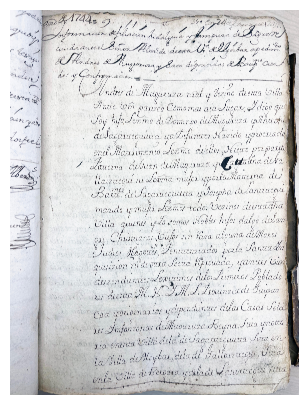

In [6]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Handle high-resolution historical scans
Image.MAX_IMAGE_PIXELS = None

df = pd.read_csv("data/labels.csv")
print(f"Total labeled pages: {len(df)}")

if len(df) > 0:
    sample = df.iloc[0]
    print(f"Sample Image: {sample['file_name']}")
    print(f"Sample Text: {sample['text'][:100]}...")

    img = Image.open(os.path.join("data/images", sample['file_name']))
    plt.figure(figsize=(10, 5))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
else:
    print("WARNING: No labeled pages found. Check DOCX/PDF alignment markers.")


In [7]:
from handwritten_llm_pipeline.inference import TrOCRInference
import torch

# Load pretrained TrOCR directly
model_name = "microsoft/trocr-base-handwritten"
inf_engine = TrOCRInference(model_name)

# Run inference on labeled pages
baselines = []
all_beams = []
references = []

for _, row in df.iterrows():
    img_path = os.path.join("data/images", row['file_name'])
    primary, beams = inf_engine.predict(img_path, num_beams=5)
    baselines.append(primary)
    all_beams.append(beams)
    references.append(row['text'])

print(f"Inference completed for {len(baselines)} pages.")
print(f"Top-1 Prediction (Sample): {baselines[0][:50]}...")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

The image processor of type `ViTImageProcessor` is now loaded as a fast processor by default, even if the model checkpoint was saved with a slow processor. This is a breaking change and may produce slightly different outputs. To continue using the slow processor, instantiate this class with `use_fast=False`. 


config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Loading weights:   0%|          | 0/478 [00:00<?, ?it/s]

VisionEncoderDecoderModel LOAD REPORT from: microsoft/trocr-base-handwritten
Key                         | Status  | 
----------------------------+---------+-
encoder.pooler.dense.weight | MISSING | 
encoder.pooler.dense.bias   | MISSING | 

Notes:
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Inference completed for 5 pages.
Top-1 Prediction (Sample): ITV....


In [8]:
from handwritten_llm_pipeline.llm_rerank import SpanishLLMRefiner

refiner = SpanishLLMRefiner("google/flan-t5-base")

reranked_results = []
for beams in all_beams:
    # Rerank the top 5 beams
    selection = refiner.rerank_beams(beams)
    reranked_results.append(selection)

print(f"Beam reranking completed.")
print(f"Reranked Selection (Sample): {reranked_results[0][:50]}...")


tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/282 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie shared.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning


generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Beam reranking completed.
Reranked Selection (Sample): ITV.T...


In [9]:
final_results = []
for text in reranked_results:
    # Contextual correction on the reranked output
    corrected = refiner.correct_paragraph(text)
    final_results.append(corrected)

print(f"Paragraph-level correction completed.")
print(f"Final Output (Sample): {final_results[0][:50]}...")


Paragraph-level correction completed.
Final Output (Sample): ITV.T...


In [10]:
from handwritten_llm_pipeline.evaluation import SpanishHTREvaluator

evaluator = SpanishHTREvaluator()

# Compare all three stages
results_df = evaluator.run_comparison(
    baselines,
    reranked_results,
    final_results,
    references
)

print("\n--- PERFORMANCE COMPARISON ---")
print(results_df.to_markdown(index=False))

# Error Analysis on Baseline
analysis = evaluator.perform_error_analysis(baselines, references)
print("\n--- ERROR ANALYSIS (BASELINE) ---")
for key, value in analysis.items():
    print(f"{key}: {value}")



--- PERFORMANCE COMPARISON ---
| Stage                  |    CER |   WER |
|:-----------------------|-------:|------:|
| Baseline TrOCR         | 0.9969 |     1 |
| + Beam Rerank          | 0.9969 |     1 |
| + Paragraph Correction | 0.997  |     1 |

--- ERROR ANALYSIS (BASELINE) ---
Common Confusions: [(('E', '0'), 2), ((' ', 'o'), 2), (('s', ' '), 2), (('n', 'T'), 1), (('f', 'V'), 1), (('o', '.'), 1), (('N', ' '), 1), ((' ', '0'), 1), (('E', 'f'), 1), (('n', 'r'), 1)]
Diacritic Error Freq: 1.0
Word-split Error Freq: 1.0
